In [22]:
##################################
# Analysis -  Mouse Gastrulation #
##################################
# stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
# celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
#                    'Haematoendothelial progenitors','Blood progenitors 1'}
# Using all 2000 genes to plot cell velocity

In [1]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

In [10]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv"
load_raw_data = pd.read_csv(raw_data_path)
gene_choice=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/MUSK_genes/13059_2021_2414_MOESM3_ESM.csv')['index'] # musk genes
load_raw_data=load_raw_data[load_raw_data.gene_list.isin(gene_choice)].reset_index(drop=True)


#  detail
detail_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/gene_samples_in_2000_genes/all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/detail_e200.csv'
detail=pd.read_csv(detail_path)
load_cellDancer=detail.copy().reset_index(drop=True)

# define output path
output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/gene_samples_in_2000_genes/all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/cell_velocity'

In [11]:
load_raw_data

,gene_list,u0,s0,cellID,clusters,embedding1,embedding2
0,Mgst3,0.000000,0.119450,cell_363,Blood progenitors 2,3.460521,15.574629
1,Mgst3,0.000000,0.097280,cell_382,Blood progenitors 2,2.490433,14.971734
2,Mgst3,0.000000,0.107186,cell_385,Blood progenitors 2,2.351203,15.267069
3,Mgst3,0.000000,0.402772,cell_393,Blood progenitors 2,5.899098,14.388825
4,Mgst3,0.000000,0.202537,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...
752064,Alas2,0.054983,5.450834,cell_139318,Erythroid3,8.032358,7.603037
752065,Alas2,0.036798,6.200462,cell_139321,Erythroid3,10.352904,6.446736
752066,Alas2,0.031082,5.794872,cell_139326,Erythroid3,9.464873,7.261099
752067,Alas2,0.026151,5.638884,cell_139327,Erythroid3,9.990495,7.243880


In [12]:
load_cellDancer

,Unnamed: 0,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost
0,0,Svbp,0.530300,0.000000,0.527942,0.000409,0.011866,0.049562,0.029907,0.071530
1,1,Svbp,0.575481,0.000000,0.572928,0.000397,0.011518,0.049688,0.029837,0.071530
2,2,Svbp,0.579049,0.000000,0.576482,0.000396,0.011491,0.049698,0.029831,0.071530
3,3,Svbp,0.624556,0.022392,1.000605,0.015580,0.027581,0.047746,0.031762,0.071530
4,4,Svbp,0.761603,0.011165,0.951767,0.007828,0.018243,0.048928,0.030816,0.071530
...,...,...,...,...,...,...,...,...,...,...
752064,12324,Cdc25b,0.430508,0.035474,0.437229,0.033417,0.030711,0.029134,0.106274,0.067124
752065,12325,Cdc25b,0.256723,0.042006,0.282289,0.038750,0.030705,0.031928,0.104316,0.067124
752066,12326,Cdc25b,0.403510,0.039255,0.415209,0.036719,0.030435,0.029342,0.106182,0.067124
752067,12327,Cdc25b,0.353691,0.040191,0.370067,0.037418,0.030525,0.030207,0.105556,0.067124


In [5]:
def tune_cell_velocity_curve(load_raw_data,load_cellDancer):
    for n_neighbors in n_neighbors_list:
        print('------n_neighbors'+str(n_neighbors))
        for add_amt_gene in add_amt_gene_list:
            print('------add_amt_gene'+str(add_amt_gene))
            for transfer_mode in transfer_mode_list:
                for mode in mode_list:
                    for pca_n_components in pca_n_components_list: # pca
                        for umap_n in umap_n_list: # umap
                            for umap_n_components in umap_n_components_list: # umap
                                for min_mass in min_mass_list:
                                    for grid_step in grid_step_list:
                                        for color_list in color_list_full:
                                            colors = {
                                            'Haematoendothelial progenitors':color_list[0],
                                            'Blood progenitors 1':color_list[1],
                                            'Blood progenitors 2':color_list[2],
                                            'Erythroid1':color_list[3],
                                            'Erythroid2':color_list[4],
                                            'Erythroid3':color_list[5]}

                                            file_name_additional_info="_transfer"+str(transfer_mode)+'_mode'+str(mode)+'_pcaN'+str(pca_n_components)+"_umapN"+str(umap_n)+'_umapNcomponents'+str(umap_n_components)+'_minMass'+str(min_mass)+'_grid_step'+str(grid_step)
                                            save_path = output_path
                                            # velocity_cell_draft(load_raw_data_four_samples,load_cellDancer_four_samples,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True,gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='embedding')
                                            # vpl.velocity_cell_map(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='gene')
                                            # velocity_cell_map_umap_draft(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n)
                                            # try:
                                            vpl.velocity_cell_map_curve(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components,min_mass=min_mass,grid_steps=(grid_step, grid_step),custom_xlim=[-6,13],custom_ylim=[2,16],alpha_inside=0.3)
                                            # except:
                                                # print("Exception: "+file_name_additional_info)

------n_neighbors10
------add_amt_gene2000
neighbors
tranfer mode: power10
using gene mode
(61, 12329)
(61, 12329)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


4.0555624593641815
0.6906665710493576
0.17030105638112603


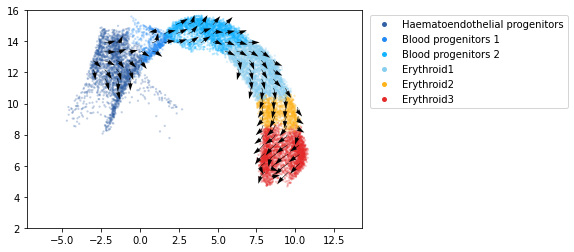

In [13]:
# we finally choose mode='gene', transfer mode='power10'

n_neighbors_list=[10]
add_amt_gene_list=[2000]

mode_list=['gene']
transfer_mode_list=['power10']

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[None]
umap_n_components_list=[None]

min_mass_list=[15]
grid_step_list=[20]

color_list_full=[solarExtra02]

tune_cell_velocity_curve(load_raw_data,load_cellDancer)



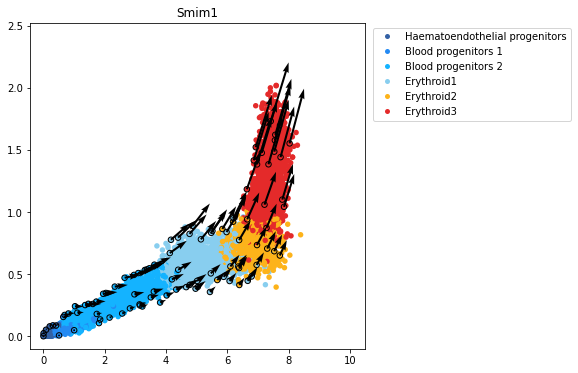

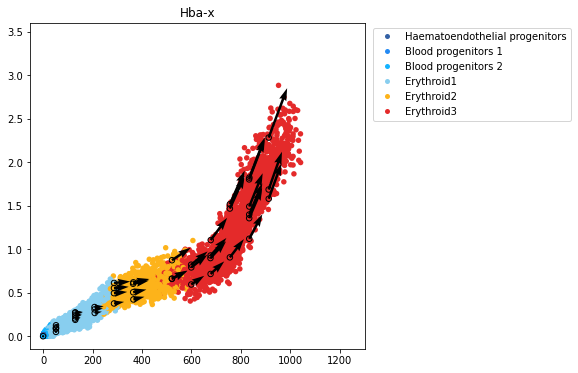

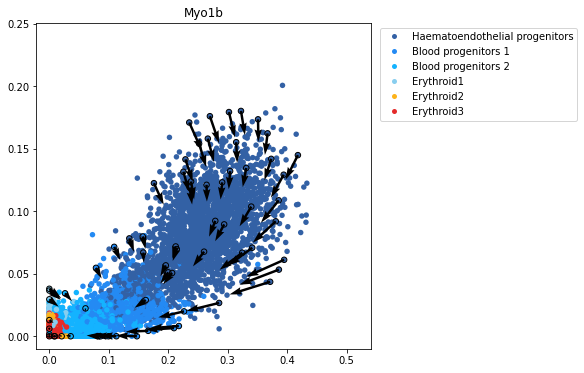

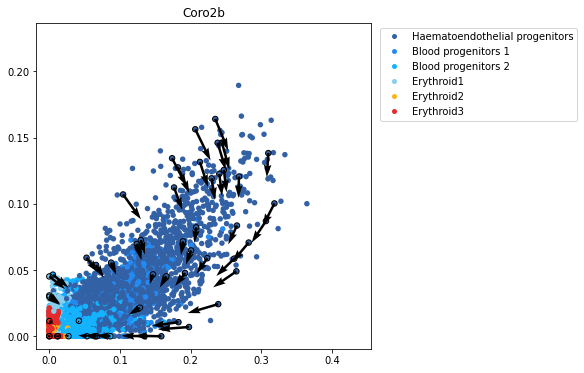

In [5]:
# gene velocity plot
color_list=solarExtra02.copy()

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}

four_samples=['Smim1','Hba-x','Myo1b','Coro2b']

one_gene_raw=load_raw_data[load_raw_data.gene_list==load_raw_data.gene_list.iloc[0]]
cluster_info=one_gene_raw['clusters']
save_dir='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/gene_velocity/'
for gene in four_samples:
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')

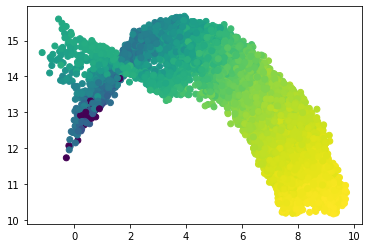

In [6]:
# Hba-x s0 in three clusters
load_raw_data_hba=load_raw_data[load_raw_data.gene_list.isin(['Hba-x'])].reset_index()
load_cellDancer_hba=load_cellDancer[load_cellDancer.gene_name.isin(['Hba-x'])].reset_index()
cell_keep=['Blood progenitors 2','Blood progenitors 1','Erythroid1']
load_raw_data_hba=load_raw_data_hba[load_raw_data_hba.clusters.isin(cell_keep)]
plt.scatter(load_raw_data_hba.embedding1, load_raw_data_hba.embedding2,c=np.log((load_raw_data_hba.s0+0.0001).to_numpy()))
# plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_level_s0/Hba-x_s0_21BP1_22BP2_23ERY1.pdf')

In [14]:
gene_list=load_cellDancer.gene_name.drop_duplicates()
for i,gene in enumerate(gene_list[2000:2001]):
    print(str(i)+gene)
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')